# <font color='green' size=6> **Решающие деревья**



In [34]:
# Импорт необходимых библиотек
import numpy as np  # Библиотека для числовых вычислений
import pandas as pd  # Библиотека для работы с данными

# Импорт набора данных
from sklearn.datasets import fetch_california_housing  # Набор данных о жилье в Калифорнии
from sklearn.linear_model import LinearRegression

# Импорт моделей и инструментов для дерева решений
from sklearn.tree import (
    DecisionTreeRegressor,  # Модель дерева решений для регрессии
    plot_tree,  # Функция для визуализации дерева решений
    export_text,  # Функция для экспорта дерева решений в текстовом формате
    export_graphviz  # Функция для экспорта дерева решений в формате Graphviz
)

from sklearn.ensemble import RandomForestRegressor
import tqdm

import graphviz  # Библиотека для визуализации графов

# Импорт метрик для оценки качества модели
from sklearn.metrics import (
    root_mean_squared_error,  # Среднеквадратическая ошибка
    mean_squared_error,  # Средняя квадратическая ошибка
    r2_score  # Коэффициент детерминации
)

# Импорт инструментов для разделения данных и поиска гиперпараметров
from sklearn.model_selection import (
    train_test_split,  # Функция для разделения данных на обучающую и тестовую выборки
    cross_val_score, # оценщик кросс-валидации
    GridSearchCV  # Класс для поиска гиперпараметров с помощью сеточного поиска
)

# Импорт библиотек для визуализации
import matplotlib.pyplot as plt  # Библиотека для создания графиков
from mlxtend.plotting import plot_decision_regions  # Функция для визуализации границ решений


In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

In [3]:
# фиксируем для вопроизводимости
my_random_state = 12345

# <font size=6 color='green'> **Регрессионное дерево**

In [4]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseValue')

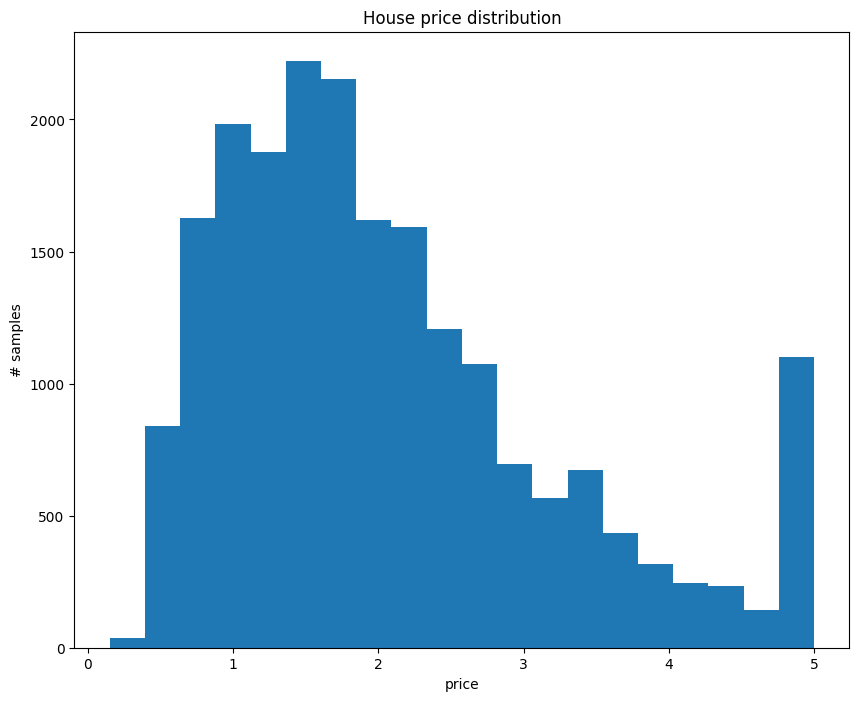

In [5]:
plt.title("House price distribution")
plt.xlabel("price")
plt.ylabel("# samples")
plt.hist(y, bins=20)
plt.show()

In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# <font size=6 color='green'> **Подготовка данных**

In [8]:
# Подготовка данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# <font size=6 color='green'> **Создание и обучение модели дерева решений**

In [27]:
# Создание и обучение модели дерева решений с поиском по сетке
param_grid = {
    'max_depth': [ 2, 3, 4, 5, 6, 7, 8, 10, 15],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'ccp_alpha': [0.01, 0.02, 0.03, 0.05] # 0.0 ccp_alpha
}

regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_regressor = grid_search.best_estimator_


In [29]:
best_params

{'ccp_alpha': 0.01,
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [30]:
# Оценка модели с оптимальными параметрами
y_pred = best_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
root_mse_test = root_mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)


mse_train = mean_squared_error(y_train, best_regressor.predict(X_train))
root_mse_train = root_mean_squared_error(y_train, best_regressor.predict(X_train))
r2_train = r2_score(y_train, best_regressor.predict(X_train))

print("Best Parameters:", best_params)
print("Mean Squared Error (MSE) TEST:", mse_test, "Mean Squared Error (MSE) TRAIN:", mse_train)
print("Root Mean Squared Error (RMSE) TEST:", root_mse_test, "Root Mean Squared Error (RMSE) TRAIN:", root_mse_train)
print("R-squared (R2) test:", r2_test, "R-squared (R2) train:", r2_train )

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE) TEST: 0.588298685702433 Mean Squared Error (MSE) TRAIN: 0.5630140205902467
Root Mean Squared Error (RMSE) TEST: 0.7670063139912429 Root Mean Squared Error (RMSE) TRAIN: 0.750342602142679
R-squared (R2) test: 0.5510571924711868 R-squared (R2) train: 0.5788276502228522


# <font size=6 color='green'> **Создание и обучение модели случайного леса**

In [31]:
rf_reg = RandomForestRegressor(
                                **best_params, 
                                random_state=1234, 
                                n_estimators=50
                                )
rf_reg.fit(X_train, y_train)


RandomForestRegressor(ccp_alpha=0.01, max_depth=6, n_estimators=50,
                      random_state=1234)

In [32]:
predict_test = rf_reg.predict(X_test)
predict_train = rf_reg.predict(X_train)

mse_test_rf = mean_squared_error(y_test, predict_test)
root_mse_rf = root_mean_squared_error(y_test, predict_test)
r2_test_rf = r2_score(y_test, predict_test)


mse_train_rf = mean_squared_error(y_train, predict_train)
root_mse_train_rf = root_mean_squared_error(y_train, predict_train)
r2_train_rf = r2_score(y_train, predict_train)

print("Best Parameters:", best_params)
print("Mean Squared Error (MSE) TEST:", mse_test_rf, "Mean Squared Error (MSE) TRAIN:", mse_train_rf)
print("Root Mean Squared Error (RMSE) TEST:", root_mse_rf, "Root Mean Squared Error (RMSE) TRAIN:", root_mse_train_rf)
print("R-squared (R2) test:", r2_test_rf, "R-squared (R2) train:", r2_train_rf )

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE) TEST: 0.528876538768242 Mean Squared Error (MSE) TRAIN: 0.503082732019258
Root Mean Squared Error (RMSE) TEST: 0.7272389832567022 Root Mean Squared Error (RMSE) TRAIN: 0.7092832523183231
R-squared (R2) test: 0.5964034530057869 R-squared (R2) train: 0.6236602844193386


# <font size=6 color='green'> **Кросс-валидация лучшего количества деревьев в случайном лесе**

In [35]:
nMSE_dict = {}
for n in tqdm.tqdm(range(10, 500, 20), desc="Progress"):
  rf = RandomForestRegressor(n_estimators=n,
                              **best_params, 
                              random_state=my_random_state,
                              max_samples=0.3,
                              n_jobs=-1)
  scores_val = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  avg_nMSE = np.mean(scores_val)
  nMSE_dict[n] = avg_nMSE

Progress: 100%|██████████| 25/25 [08:37<00:00, 20.71s/it]


In [37]:
import plotly.express as px
px.line(x=nMSE_dict.keys(), y=nMSE_dict.values(), labels={'y':'nMSE','x':'number of trees' })

# <font size=6 color='green'> **Использование лучших параметров в случайном лесе**

In [38]:
rf_reg = RandomForestRegressor(
                                **best_params, 
                                random_state=1234, 
                                n_estimators=90
                                )
rf_reg.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.01, max_depth=6, n_estimators=90,
                      random_state=1234)

In [39]:
predict_test = rf_reg.predict(X_test)
predict_train = rf_reg.predict(X_train)

mse_test_rf = mean_squared_error(y_test, predict_test)
root_mse_rf = root_mean_squared_error(y_test, predict_test)
r2_test_rf = r2_score(y_test, predict_test)


mse_train_rf = mean_squared_error(y_train, predict_train)
root_mse_train_rf = root_mean_squared_error(y_train, predict_train)
r2_train_rf = r2_score(y_train, predict_train)

print("Best Parameters:", best_params)
print("Mean Squared Error (MSE) TEST:", mse_test_rf, "Mean Squared Error (MSE) TRAIN:", mse_train_rf)
print("Root Mean Squared Error (RMSE) TEST:", root_mse_rf, "Root Mean Squared Error (RMSE) TRAIN:", root_mse_train_rf)
print("R-squared (R2) test:", r2_test_rf, "R-squared (R2) train:", r2_train_rf )

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE) TEST: 0.5258808246435924 Mean Squared Error (MSE) TRAIN: 0.50101764708741
Root Mean Squared Error (RMSE) TEST: 0.7251764093264428 Root Mean Squared Error (RMSE) TRAIN: 0.7078260005731706
R-squared (R2) test: 0.5986895439700529 R-squared (R2) train: 0.6252051068241591


Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

Mean Squared Error (MSE) TEST: 0.528876538768242 Mean Squared Error (MSE) TRAIN: 0.503082732019258

Root Mean Squared Error (RMSE) TEST: 0.7272389832567022 Root Mean Squared Error (RMSE) TRAIN: 0.7092832523183231

R-squared (R2) test: 0.5964034530057869 R-squared (R2) train: 0.6236602844193386


In [45]:
rf_reg.estimator_

DecisionTreeRegressor()

In [46]:
rf_reg.feature_importances_

array([0.80656135, 0.02050407, 0.0165882 , 0.        , 0.        ,
       0.13181087, 0.01827898, 0.00625653])

In [47]:
important_lst = rf_reg.feature_importances_ # на основании критерия Джинни (или энтропия) оценивается важность столбцов
feature_names = X_train.columns

In [48]:
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': important_lst
})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
feature_importances_df 

,feature,importance
0,MedInc,0.806561
5,AveOccup,0.131811
1,HouseAge,0.020504
6,Latitude,0.018279
2,AveRooms,0.016588
7,Longitude,0.006257
3,AveBedrms,0.000000
4,Population,0.000000


C:\Users\user\AppData\Local\Temp\ipykernel_30340\3065290149.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




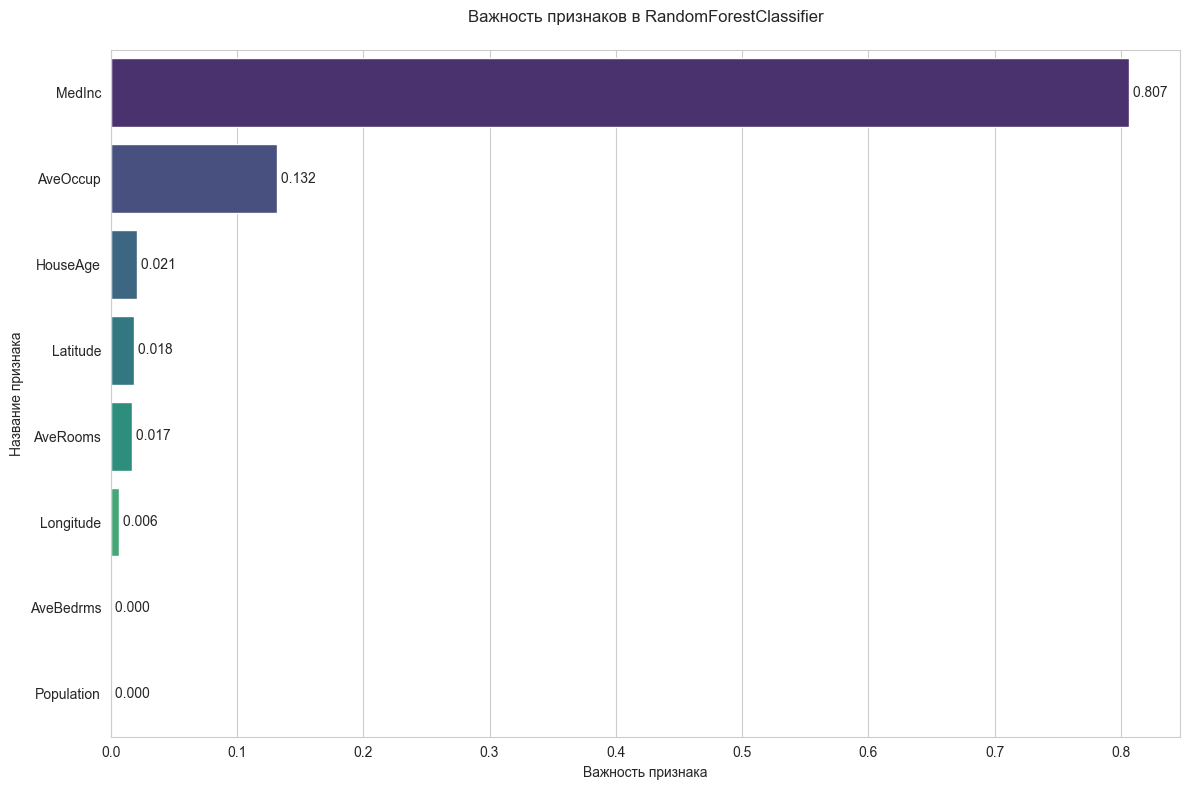


Важность признаков:
   feature  importance
    MedInc    0.806561
  AveOccup    0.131811
  HouseAge    0.020504
  Latitude    0.018279
  AveRooms    0.016588
 Longitude    0.006257
 AveBedrms    0.000000
Population    0.000000


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графика
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Создание горизонтального бар-чарта
ax = sns.barplot(
    x='importance',
    y='feature',
    data=feature_importances_df,
    palette='viridis'
)

# Добавление заголовка и меток
plt.title('Важность признаков в RandomForestClassifier', pad=20)
plt.xlabel('Важность признака')
plt.ylabel('Название признака')

# Добавление значений на график
for i, v in enumerate(feature_importances_df['importance']):
    ax.text(v, i, f' {v:.3f}', va='center')

# Настройка отображения
plt.tight_layout()
plt.show()

# Вывод значений в консоль
print("\nВажность признаков:")
print(feature_importances_df.to_string(index=False))

# <font size=6 color='green'> **Линейная регрессия для сравнения**

In [33]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Оценка модели с оптимальными параметрами
y_pred_linear = model_linear.predict(X_test)
mse_test_linear = mean_squared_error(y_test, y_pred_linear)
root_mse_test_linear = root_mean_squared_error(y_test, y_pred_linear)
r2_test_linear = r2_score(y_test, y_pred_linear)


mse_train_linear = mean_squared_error(y_train, model_linear.predict(X_train))
root_mse_train_linear = root_mean_squared_error(y_train, model_linear.predict(X_train))
r2_train_linear = r2_score(y_train, model_linear.predict(X_train))

print("Mean Squared Error (MSE) TEST:", mse_test_linear, "Mean Squared Error (MSE) TRAIN:", mse_train_linear)
print("Root Mean Squared Error (RMSE) TEST:", root_mse_test_linear, "Root Mean Squared Error (RMSE) TRAIN:", root_mse_train_linear)
print("R-squared (R2) test:", r2_test_linear, "R-squared (R2) train:", r2_train_linear )

Mean Squared Error (MSE) TEST: 0.555891598695244 Mean Squared Error (MSE) TRAIN: 0.5179331255246699
Root Mean Squared Error (RMSE) TEST: 0.7455813830127761 Root Mean Squared Error (RMSE) TRAIN: 0.7196757085831575
R-squared (R2) test: 0.5757877060324511 R-squared (R2) train: 0.6125511913966952


In [12]:
# Оценка модели с оптимальными параметрами
y_pred = best_regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
root_mse_test = root_mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)


mse_train = mean_squared_error(y_train, best_regressor.predict(X_train))
root_mse_train = root_mean_squared_error(y_train, best_regressor.predict(X_train))
r2_train = r2_score(y_train, best_regressor.predict(X_train))

print("Best Parameters:", best_params)
print("Mean Squared Error (MSE) TEST:", mse_test, "Mean Squared Error (MSE) TRAIN:", mse_train)
print("Root Mean Squared Error (RMSE) TEST:", root_mse_test, "Root Mean Squared Error (RMSE) TRAIN:", root_mse_train)
print("R-squared (R2) test:", r2_test, "R-squared (R2) train:", r2_train )


Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE) TEST: 0.5958289750891671 Mean Squared Error (MSE) TRAIN: 0.5734195340960829
Root Mean Squared Error (RMSE) TEST: 0.7718995887349385 Root Mean Squared Error (RMSE) TRAIN: 0.7572446989554189
R-squared (R2) test: 0.5453106740088036 R-squared (R2) train: 0.5710436263555666


# <font size=6 color='green'> **Визуализация дерева решений**

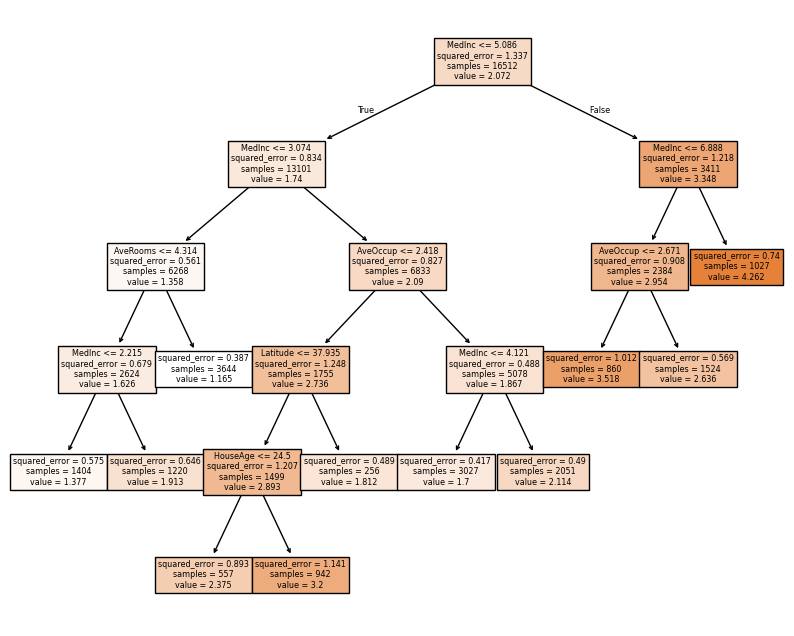

In [13]:
# Шаг 5: Визуализация дерева решений
plt.figure(figsize=(10, 8))
plot_tree(best_regressor, filled=True, feature_names=data.feature_names)
plt.show()

# <font size=6 color='green'> **Сохранение результатов кросс-валидации**

In [14]:
# Сохранение результатов кросс-валидации
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.141538,0.027936,0.009231,0.002816,0.01,3,1,2,"{'ccp_alpha': 0.01, 'max_depth': 3, 'min_sampl...",-0.653522,-0.608189,-0.636479,-0.639781,-0.65974,-0.639542,0.017865,19
1,0.150130,0.029474,0.009612,0.004484,0.01,3,1,5,"{'ccp_alpha': 0.01, 'max_depth': 3, 'min_sampl...",-0.653522,-0.608189,-0.636479,-0.639781,-0.65974,-0.639542,0.017865,19
2,0.152638,0.026313,0.007999,0.002431,0.01,3,1,10,"{'ccp_alpha': 0.01, 'max_depth': 3, 'min_sampl...",-0.653522,-0.608189,-0.636479,-0.639781,-0.65974,-0.639542,0.017865,19
3,0.142172,0.024155,0.006766,0.002097,0.01,3,2,2,"{'ccp_alpha': 0.01, 'max_depth': 3, 'min_sampl...",-0.653522,-0.608189,-0.636479,-0.639781,-0.65974,-0.639542,0.017865,19
4,0.156541,0.024949,0.008454,0.004056,0.01,3,2,5,"{'ccp_alpha': 0.01, 'max_depth': 3, 'min_sampl...",-0.653522,-0.608189,-0.636479,-0.639781,-0.65974,-0.639542,0.017865,19


# <font size=6 color='green'> **Визуализация text_representation**

In [15]:
text_representation = export_text(best_regressor, feature_names=data.feature_names)
print(text_representation)

|--- MedInc <= 5.09
|   |--- MedInc <= 3.07
|   |   |--- AveRooms <= 4.31
|   |   |   |--- MedInc <= 2.21
|   |   |   |   |--- value: [1.38]
|   |   |   |--- MedInc >  2.21
|   |   |   |   |--- value: [1.91]
|   |   |--- AveRooms >  4.31
|   |   |   |--- value: [1.17]
|   |--- MedInc >  3.07
|   |   |--- AveOccup <= 2.42
|   |   |   |--- Latitude <= 37.93
|   |   |   |   |--- HouseAge <= 24.50
|   |   |   |   |   |--- value: [2.38]
|   |   |   |   |--- HouseAge >  24.50
|   |   |   |   |   |--- value: [3.20]
|   |   |   |--- Latitude >  37.93
|   |   |   |   |--- value: [1.81]
|   |   |--- AveOccup >  2.42
|   |   |   |--- MedInc <= 4.12
|   |   |   |   |--- value: [1.70]
|   |   |   |--- MedInc >  4.12
|   |   |   |   |--- value: [2.11]
|--- MedInc >  5.09
|   |--- MedInc <= 6.89
|   |   |--- AveOccup <= 2.67
|   |   |   |--- value: [3.52]
|   |   |--- AveOccup >  2.67
|   |   |   |--- value: [2.64]
|   |--- MedInc >  6.89
|   |   |--- value: [4.26]



In [16]:
best_regressor.feature_importances_

array([0.8231479 , 0.01885911, 0.0256878 , 0.        , 0.        ,
       0.11202601, 0.02027919, 0.        ])

In [17]:
pd.DataFrame(
    {"feature": X.columns, "importance": best_regressor.feature_importances_}
).sort_values(by="importance", ascending=False).reset_index(drop=True)

,feature,importance
0,MedInc,0.823148
1,AveOccup,0.112026
2,AveRooms,0.025688
3,Latitude,0.020279
4,HouseAge,0.018859
5,AveBedrms,0.000000
6,Population,0.000000
7,Longitude,0.000000


# Отображение на графике

In [18]:
X['MedInc']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [19]:
# Подготовка данных
X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(pd.DataFrame(X['MedInc'], columns=['MedInc']), y, test_size=0.2, random_state=42)

In [20]:
# Создание и обучение модели дерева решений с поиском по сетке
param_grid = {
    'max_depth': [ 1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.01, 0.02, 0.03]
}

regressor_train_short = DecisionTreeRegressor(random_state=42)
grid_search_train_short = GridSearchCV(regressor_train_short, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_train_short.fit(X_train_short, y_train_short)

best_params_train_short = grid_search_train_short.best_params_
best_regressor_train_short = grid_search_train_short.best_estimator_


In [21]:
# Оценка модели с оптимальными параметрами
y_pred_short = best_regressor_train_short.predict(X_test_short)
mse_test_short = mean_squared_error(X_test_short, y_pred_short)
root_mse_test_short = root_mean_squared_error(X_test_short, y_pred_short)
r2_test_short = r2_score(X_test_short, y_pred_short)


mse_train_short = mean_squared_error(X_train_short, best_regressor_train_short.predict(X_train_short))
root_mse_train_short = root_mean_squared_error(X_train_short, best_regressor_train_short.predict(X_train_short))
r2_train_short = r2_score(X_train_short, best_regressor_train_short.predict(X_train_short))

print("Best Parameters:", best_params_train_short)
print("Mean Squared Error (MSE) TEST:", mse_test_short, "Mean Squared Error (MSE) TRAIN:", mse_train_short)
print("Root Mean Squared Error (RMSE) TEST:", root_mse_test_short, "Root Mean Squared Error (RMSE) TRAIN:", root_mse_train_short)
print("R-squared (R2) test:", r2_test_short, "R-squared (R2) train:", r2_train_short )


Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE) TEST: 4.506607847948849 Mean Squared Error (MSE) TRAIN: 4.633402135581953
Root Mean Squared Error (RMSE) TEST: 2.1228772569201566 Root Mean Squared Error (RMSE) TRAIN: 2.1525338872087363
R-squared (R2) test: -0.27332567595758994 R-squared (R2) train: -0.2777866142633525


In [22]:
model_linear = LinearRegression()
model_linear.fit(X_train_short, y_train_short)

# Оценка модели с оптимальными параметрами
y_pred_linear = model_linear.predict(X_test_short)
mse_test_linear = mean_squared_error(y_test_short, y_pred_linear)
root_mse_test_linear = root_mean_squared_error(y_test_short, y_pred_linear)
r2_test_linear = r2_score(y_test_short, y_pred_linear)


mse_train_linear = mean_squared_error(y_train_short, model_linear.predict(X_train_short))
root_mse_train_linear = root_mean_squared_error(y_train_short, model_linear.predict(X_train_short))
r2_train_linear = r2_score(y_train_short, model_linear.predict(X_train_short))

print("Mean Squared Error (MSE) TEST:", mse_test_linear, "Mean Squared Error (MSE) TRAIN:", mse_train_linear)
print("Root Mean Squared Error (RMSE) TEST:", root_mse_test_linear, "Root Mean Squared Error (RMSE) TRAIN:", root_mse_train_linear)
print("R-squared (R2) test:", r2_test_linear, "R-squared (R2) train:", r2_train_linear )

Mean Squared Error (MSE) TEST: 0.7091157771765548 Mean Squared Error (MSE) TRAIN: 0.6991447170182823
Root Mean Squared Error (RMSE) TEST: 0.8420901241414454 Root Mean Squared Error (RMSE) TRAIN: 0.8361487409655547
R-squared (R2) test: 0.45885918903846656 R-squared (R2) train: 0.47699273458205227


In [23]:
X_test_short.to_numpy()


array([[1.6812],
       [2.5313],
       [3.4801],
       ...,
       [9.2298],
       [2.785 ],
       [3.5521]])

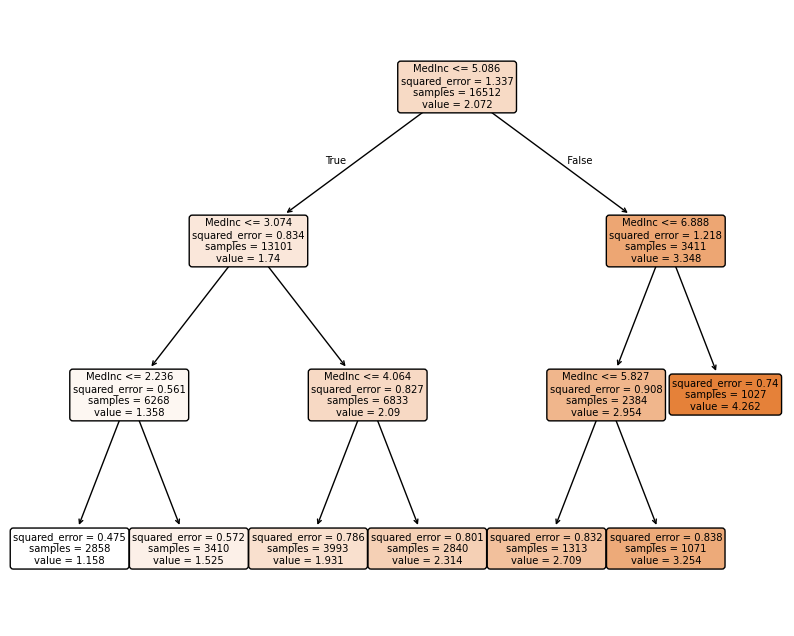

In [24]:
plot_tree(best_regressor_train_short, feature_names=X_test_short.columns, filled=True, rounded=True)
plt.show()